# Regression

In [1]:
set.seed(37)

## Simple regression

Below, we generate data.

* $X \sim \mathcal{N}(5, 1)$
* $Y = 5.0 + 3.2X + \sigma$
* $\sigma \sim \mathcal{N}(0, 1)$

In [2]:
N <- 100
x <- rnorm(N, mean=5, sd=1)
y <- 5 + 3.2 * x + rnorm(N, mean=0, sd=1)
df <- data.frame(x=x, y=y)

To perform the regression.

In [3]:
df.lm = lm(y ~ x, data=df)
print(summary(df.lm))


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21229 -0.63914 -0.08198  0.60716  2.59378 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4522     0.4891   11.15   <2e-16 ***
x             3.1287     0.0975   32.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 98 degrees of freedom
Multiple R-squared:  0.9131,	Adjusted R-squared:  0.9122 
F-statistic:  1030 on 1 and 98 DF,  p-value: < 2.2e-16



To get the coefficients.

In [4]:
c <- coef(df.lm)
print(c)

(Intercept)           x 
   5.452218    3.128706 


To get the confidence interval.

In [5]:
c <- confint(df.lm, parm=c('(Intercept)', 'x'), level=0.9)
print(c)

                 5 %     95 %
(Intercept) 4.640068 6.264369
x           2.966801 3.290610


To get the fitted values of `X` using the learned model.

In [6]:
f <- fitted(df.lm)
for (yPred in f[1:10]) {
    print(yPred)
}

[1] 21.48607
[1] 22.29115
[1] 22.90803
[1] 20.1767
[1] 18.50409
[1] 20.05478
[1] 20.49454
[1] 25.36012
[1] 23.77378
[1] 21.77153


To get the `residuals` of the fitted values.

In [7]:
r <- residuals(df.lm)
for (res in r[1:10]) {
    print(res)
}

[1] 1.471064
[1] 1.531029
[1] -0.3335371
[1] 1.130025
[1] 2.593778
[1] -0.7148812
[1] 0.6899749
[1] 1.203087
[1] -0.2244655
[1] 1.70288


To plot the data with the best fit line.

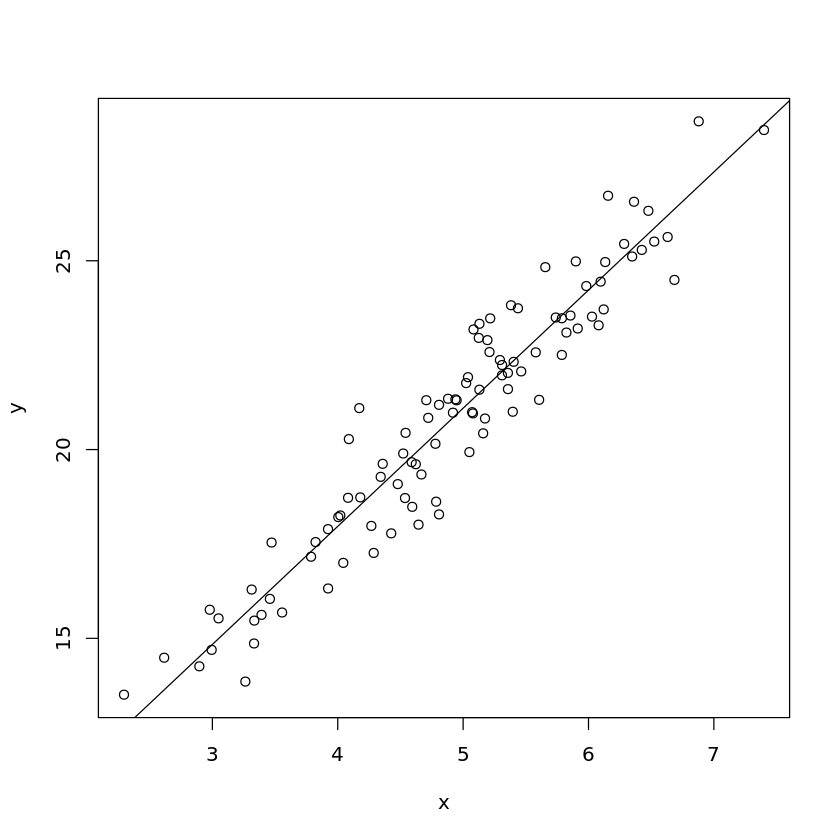

In [8]:
plot(y ~ x, data=df)
abline(df.lm)

## Multiple regression

Here we simulate data as follows.

* $X_1 \sim \mathcal{N}(5, 1)$
* $X_2 \sim \mathcal{N}(2, 2)$
* $Y = 5 + 3.2X_1 - 0.8X_2 + \sigma$
* $\sigma \sim \mathcal{N}(0, 1)$

In [9]:
N <- 100
x1 <- rnorm(N, mean=5, sd=1)
x2 <- rnorm(N, mean=2, sd=2)
y <- 5 + 3.2 * x1 - 0.8 * x2 + rnorm(N, mean=0, sd=1)
df <- data.frame(x1=x1, x2=x2, y=y)

In [10]:
df.lm = lm(y ~ ., data=df)

In [11]:
s <- summary(df.lm)
print(s)


Call:
lm(formula = y ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16504 -0.69771  0.07134  0.64150  2.40497 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.55549    0.43137   10.56   <2e-16 ***
x1           3.27409    0.08499   38.52   <2e-16 ***
x2          -0.78302    0.04806  -16.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9612 on 97 degrees of freedom
Multiple R-squared:  0.944,	Adjusted R-squared:  0.9429 
F-statistic: 818.2 on 2 and 97 DF,  p-value: < 2.2e-16



In [12]:
c <- coef(df.lm)
print(c)

(Intercept)          x1          x2 
  4.5554927   3.2740864  -0.7830219 


In [13]:
c <- confint(df.lm, parm=c('(Intercept)', 'x1', 'x2'), level=0.9)
print(c)

                   5 %       95 %
(Intercept)  3.8391064  5.2718790
x1           3.1329343  3.4152384
x2          -0.8628321 -0.7032116


## Comparing models

You may compare models using `analysis of variance`.

Here we simulate data as follows. Note that $Y$ is not dependent on $X_3$.

* $X_1 \sim \mathcal{N}(5, 1)$
* $X_2 \sim \mathcal{N}(2, 2)$
* $X_3 \sim \mathcal{N}(8, 1)$
* $Y = 5 + 3.2X_1 - 0.8X_2 + \sigma$
* $\sigma \sim \mathcal{N}(0, 1)$

In [14]:
N <- 1000
x1 <- rnorm(N, mean=5, sd=1)
x2 <- rnorm(N, mean=2, sd=2)
x3 <- rnorm(N, mean=8, sd=1)
y <- 5 + 3.2 * x1 - 0.8 * x2 + rnorm(N, mean=0, sd=1)
df <- data.frame(x1=x1, x2=x2, y=y)

In [15]:
df.lm1 = lm(y ~ x1, data=df)
df.lm2 = lm(y ~ x1 + x2, data=df)
df.lm3 = lm(y ~ x1 + x2 + x3, data=df)

The interpretation below is that adding `x2` to the baseline model improves the model but adding `x3` does not.

In [16]:
r <- anova(df.lm1, df.lm2, df.lm3)
print(r)

Analysis of Variance Table

Model 1: y ~ x1
Model 2: y ~ x1 + x2
Model 3: y ~ x1 + x2 + x3
  Res.Df    RSS Df Sum of Sq         F Pr(>F)    
1    998 3518.2                                  
2    997 1058.2  1   2460.00 2316.9187 <2e-16 ***
3    996 1057.5  1      0.65    0.6126  0.434    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Diagnostic plots

Diagnostic plots may also help you visually troubleshoot regression models. Simply use the `plot` command on the model.

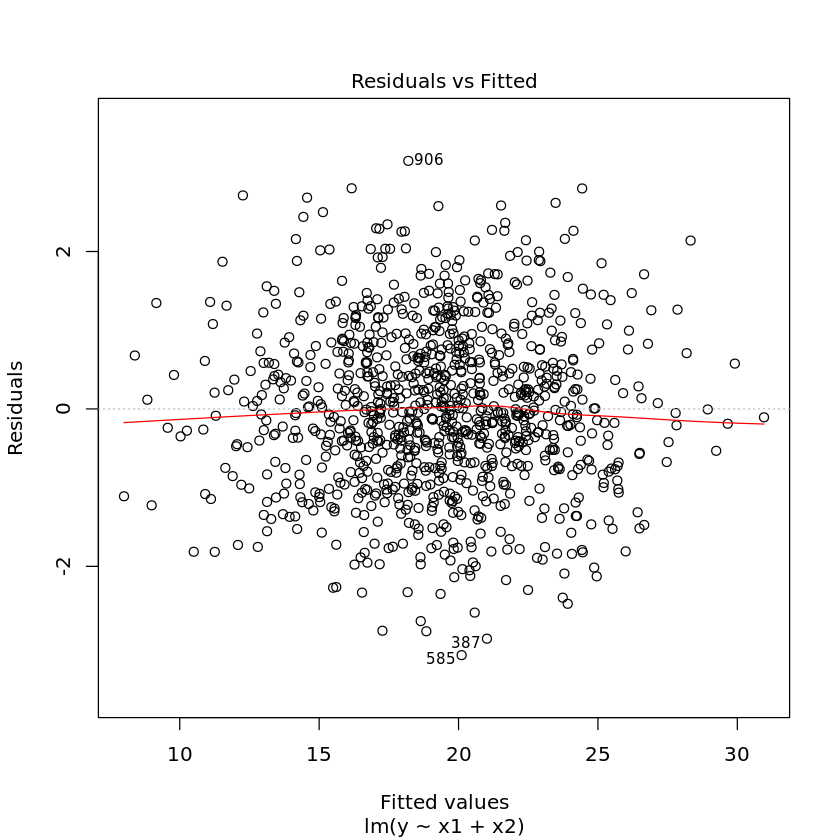

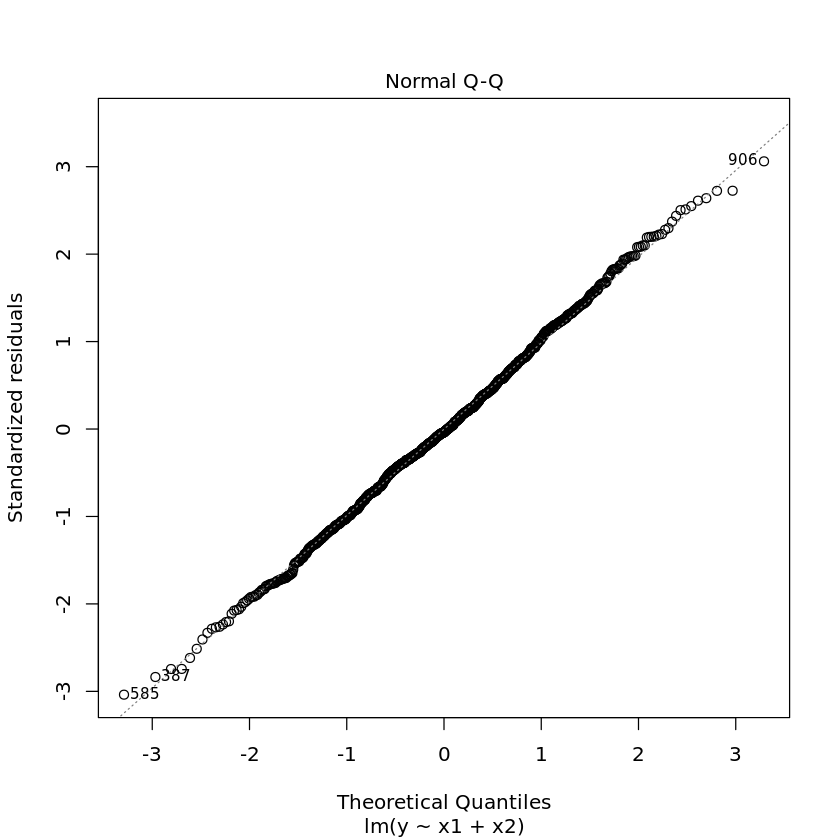

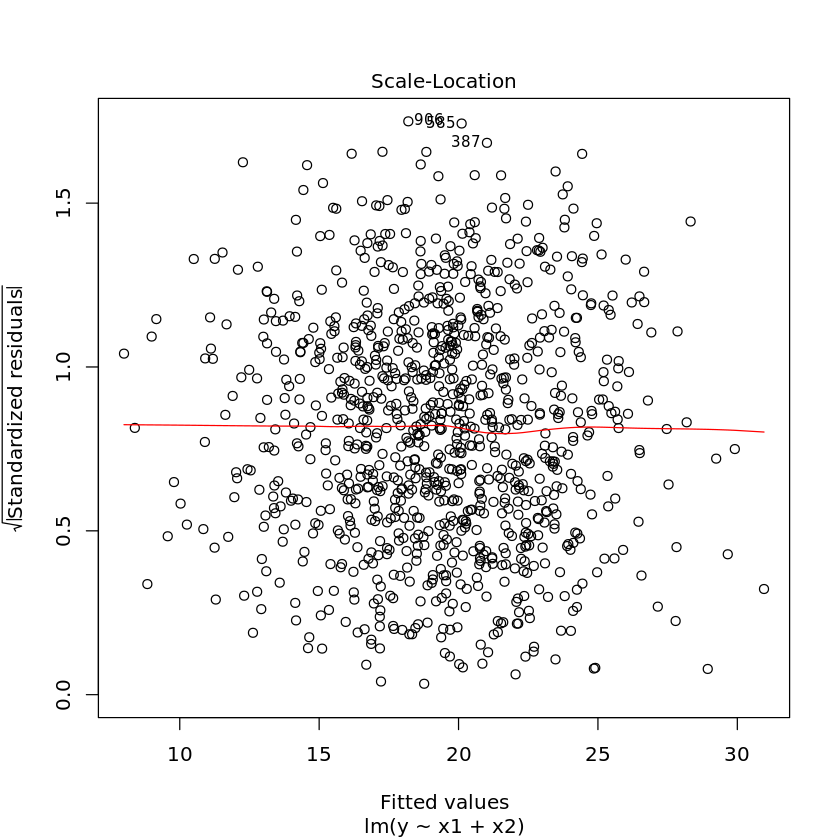

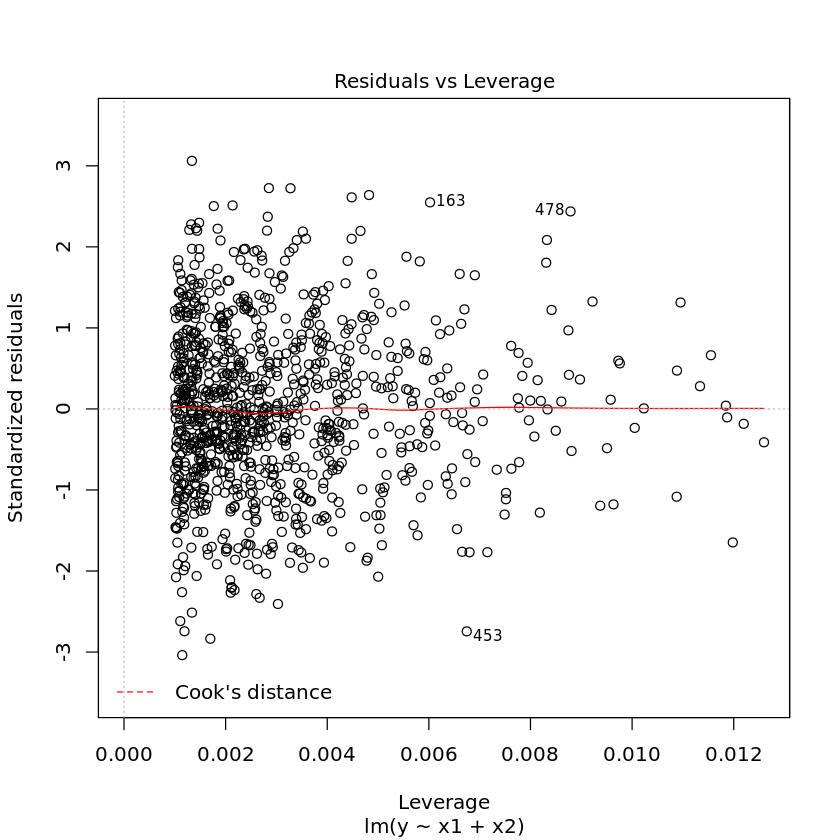

In [17]:
plot(df.lm2)